# Analysis of an online retail

This dataset is an [Online Retail dataset](https://www.kaggle.com/datasets/tunguz/online-retail) containing sales transaction. According to the dataset information:

*This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011*
*for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts.*
*Many customers of the company are wholesalers.*

This analysis consist of 3 major steps:

- A first exploration of the data.
- Cleaning the data.
- A deeper exploration of the data and gaining insights.
- Data analysis and visualisation.
- Drawing conclusions.

Load the dataset

In [2]:
import os
import pandas as pd

# Get the absolute path to the current notebook
os_path = os.getcwd()
# Add the extra path to the dataset file
dataset_path = os_path+'\datasets\Online_Retail.csv'
dataset_retail = pd.read_csv(dataset_path, encoding='ISO-8859-1')
dataset_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


Get information about the number of columns and the associated datatypes.

In [3]:
# Get the columns and the datatypes
dataset_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Data cleaning

### Data exploration

As a first step identify null or empty values in the dataset.

In [4]:
# fint the total empty elements per column
dataset_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Also is important to know, how many repeated rows exist in the dataset.

In [5]:
dataset_retail.duplicated().sum()

np.int64(5268)

Find the unique values per column

In [6]:
# dictionary comprehension
unique_values = {col: dataset_retail[col].unique() for col in dataset_retail.columns if (col == 'Country' or col == 'CustomerID')}

# Print the unique values
for col, vals in unique_values.items():
    print(f'Column name: {col}')
    print(f'Number of unique values: {len(vals)}')
    print(f'First 20 unique values: {vals[:20]}')
    print(50*'=') # separator

Column name: CustomerID
Number of unique values: 4373
First 20 unique values: [17850. 13047. 12583. 13748. 15100. 15291. 14688. 17809. 15311. 14527.
 16098. 18074. 17420. 16029. 16250. 12431. 17511. 17548. 13705. 13747.]
Column name: Country
Number of unique values: 38
First 20 unique values: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden']


### Data cleaning

Then, the first step in cleaning the data in this analysis is to remove empty values in the key columns.
- The **Description** column can contain empty values without affecting the analysis.
- The **CustomerID** column is important to keep track of all transactions and their details.

So, for this analysis, only the missing values in the **CustomerID** column will be removed.

In [7]:
# Remove the emty values in the column 'CustomerID'
dataset_retail_clean = dataset_retail.dropna(subset=['CustomerID'])
# Count the total number of empty cell per column
dataset_retail_clean.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

As can be seen, the removed cells also contained empty cells in **Description**.

The next step is to remove the duplicated rows, found in a previous cell.

In [8]:
# remove duplicates
dataset_retail_clean = dataset_retail_clean.drop_duplicates()
# Count the total duplicated rows after the operation
dataset_retail_clean.duplicated().sum()

np.int64(0)

## Data preparation

Let's take a look at the current state of the cleaned data before start the dataset transformation. Transformation means adding and deleting columns, changing columns datatypes, changing main index, etc.

In [9]:
dataset_retail_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [10]:
dataset_retail_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


### Create new columns

Let's create a new columns with name `TotalAmount`, which will represent the total cost of sold products, the number of sold products times the unitary price of that product.

In [11]:
dataset_retail_clean['TotalAmount'] = dataset_retail_clean['Quantity'] * dataset_retail_clean['UnitPrice']
dataset_retail_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


Let's change the type of the field or column `InvoiceDate` from `object` to `Datetime` in order to work with time series easily.

In [12]:
dataset_retail_clean['InvoiceDate'] = pd.to_datetime(dataset_retail_clean['InvoiceDate'], format='%m/%d/%y %H:%M')
dataset_retail_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalAmount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


Create 2 new columns for `Year` and `Month`

In [13]:
dataset_retail_clean['Year'] = dataset_retail_clean['InvoiceDate'].dt.year
dataset_retail_clean['Month'] = dataset_retail_clean['InvoiceDate'].dt.month
dataset_retail_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


### Create new sub-dataframes

Create a dataframe that contain the total sales per year, the total sales per quarter and total sales per month.

**Total sales per year.**

In [14]:
df_sale_per_year = dataset_retail_clean.groupby('Year')['TotalAmount'].sum()
df_sale_per_year

Year
2010     552372.860
2011    7726146.564
Name: TotalAmount, dtype: float64

**Total sales per semester.**

In [15]:
# Create a new column called Semester. 1 for first half, 2 for second half.
dataset_retail_clean['Semester'] = dataset_retail_clean['Month'].apply(lambda x: 1 if x <= 6 else 2)

In [16]:
# Create the new dataframe for semesters
df_sales_per_semester = dataset_retail_clean.groupby(['Year', 'Semester'])['TotalAmount'].sum()
df_sales_per_semester

Year  Semester
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalAmount, dtype: float64

**Total sales per quarter**

In [17]:
# Create a new column: Quarters.
dataset_retail_clean['Quarter'] = dataset_retail_clean['Month'].apply(lambda x : 1 if x <= 3 else (2 if x <= 6 else (3 if x <= 9 else 4)))

In [18]:
# create the new dataframe for total sales per quarter
df_sales_per_quarter = dataset_retail_clean.groupby(['Year', 'Quarter'])['TotalAmount'].sum()
df_sales_per_quarter

Year  Quarter
2010  4           552372.860
2011  1          1487842.180
      2          1679096.861
      3          2117546.643
      4          2441660.880
Name: TotalAmount, dtype: float64

**Total sales per month**

In [19]:
df_sales_per_month = dataset_retail_clean.groupby(['Year', 'Month'])['TotalAmount'].sum()
df_sales_per_month

Year  Month
2010  12        552372.860
2011  1         473731.900
      2         435534.070
      3         578576.210
      4         425222.671
      5         647011.670
      6         606862.520
      7         573112.321
      8         615078.090
      9         929356.232
      10        973306.380
      11       1126815.070
      12        341539.430
Name: TotalAmount, dtype: float64

### Get important quantities

Get the value total quantity of returns and sales

In [20]:
total_returns = dataset_retail_clean[dataset_retail_clean['Quantity'] < 0]
total_returns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester,Quarter
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010,12,2,4
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010,12,2,4
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010,12,2,4
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,12,2,4
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,12,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,2011,12,2,4
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,2011,12,2,4
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,2011,12,2,4
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,2011,12,2,4


In [21]:
total_sales = dataset_retail_clean[dataset_retail_clean['Quantity'] > 0]
total_sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,2,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,2,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,2,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,2,4


## Data visualisation and analysis of results

### Percentage ration sales to returns

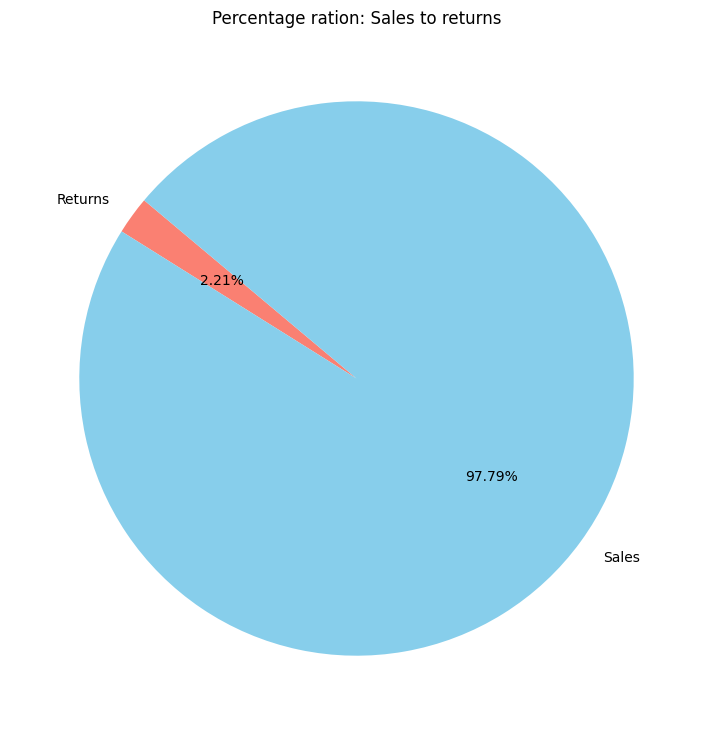

In [22]:
import matplotlib.pyplot as plt

# style parameters
labels = ['Returns', 'Sales']
sizes = [total_returns.shape[0], total_sales.shape[0]]
colors = ['salmon', 'skyblue']

# main parameters
plt.figure(figsize=(9,9))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=140)

# title
plt.title('Percentage ration: Sales to returns')

# render plor
plt.show()

### Create the categories wholesalers and retailers

Create the new column with 2 categories: Wholesale and Retail.

In [23]:
# Create a custom function to define the category based on the product quantity
def categorize_quantity(quantity):
    if quantity <= 20:
        return 'Retail'
    else:
        return 'Wholesale'
    
# create the column with the new categories
dataset_retail_clean['CategoryQuantity'] = dataset_retail_clean['Quantity'].apply(categorize_quantity)

# Show the first 5 rows
dataset_retail_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester,Quarter,CategoryQuantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2,4,Retail
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,4,Retail
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2,4,Retail
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,4,Retail
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,4,Retail


Colculate and plot the results

In [24]:
total_wholesales = dataset_retail_clean[dataset_retail_clean['CategoryQuantity'] == 'Wholesale'].shape[0]
total_wholesales

54533

In [25]:
total_retails = dataset_retail_clean[dataset_retail_clean['CategoryQuantity'] == 'Retail'].shape[0]
total_retails

347071

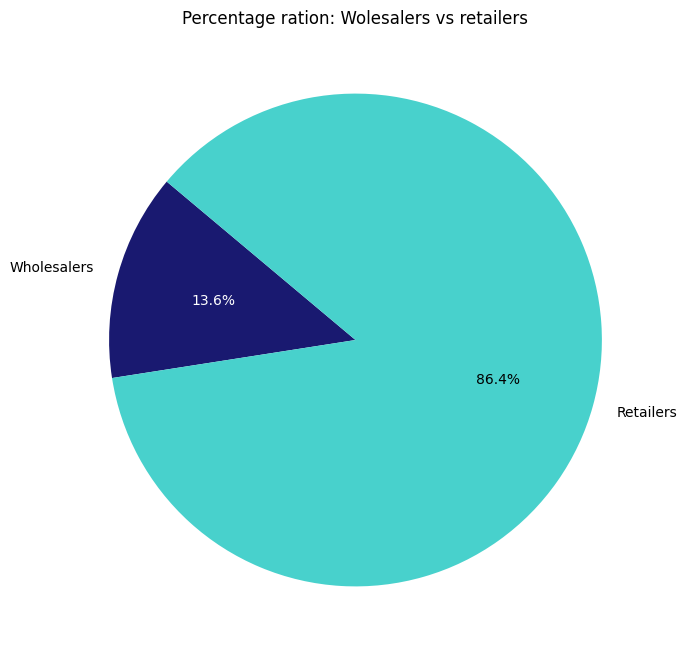

In [26]:
# style parameters
labels = ['Wholesalers', 'Retailers']
sizes = [total_wholesales, total_retails]
colors2 = ['midnightblue', 'mediumturquoise']

# main parameters
plt.figure(figsize=(8,8))
patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors2, startangle=140)

autotexts[0].set_color('white')

# title
plt.title('Percentage ration: Wolesalers vs retailers')

# render plor
plt.show()

### Get the sales per Semester

In [27]:
# reset the indices
df_sales_per_semester = df_sales_per_semester.reset_index()
df_sales_per_semester

,Year,Semester,TotalAmount
0,2010,2,552372.860
1,2011,1,3166939.041
2,2011,2,4559207.523


In [28]:
# Combine Year and Semester in a new column for x-axis labels
df_sales_per_semester['Year_Semester'] = df_sales_per_semester['Year'].astype(str) + ' - ' + df_sales_per_semester['Semester'].astype(str)
df_sales_per_semester.head()

,Year,Semester,TotalAmount,Year_Semester
0,2010,2,552372.860,2010 - 2
1,2011,1,3166939.041,2011 - 1
2,2011,2,4559207.523,2011 - 2


<Figure size 1000x600 with 0 Axes>

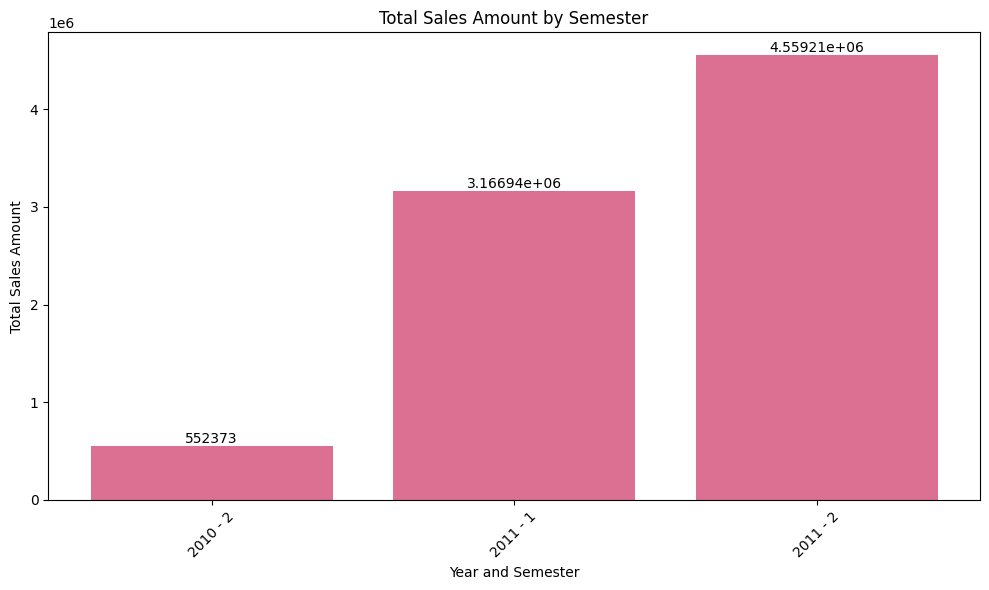

In [29]:
plt.figure(figsize=(10,6))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(df_sales_per_semester['Year_Semester'], 
        df_sales_per_semester['TotalAmount'], 
        color='palevioletred')

plt.bar_label(bars)

# Adding titles and labels
plt.title('Total Sales Amount by Semester')
plt.xlabel('Year and Semester')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

### Get the sales per quarter

In [30]:
# reset the indices
df_sales_per_quarter = df_sales_per_quarter.reset_index()
df_sales_per_quarter

,Year,Quarter,TotalAmount
0,2010,4,552372.860
1,2011,1,1487842.180
2,2011,2,1679096.861
3,2011,3,2117546.643
4,2011,4,2441660.880


In [31]:
# Combine Year and Semester in a new column for x-axis labels
df_sales_per_quarter['Year_Quarter'] = df_sales_per_quarter['Year'].astype(str) + ' - q' + df_sales_per_quarter['Quarter'].astype(str)
df_sales_per_quarter

,Year,Quarter,TotalAmount,Year_Quarter
0,2010,4,552372.860,2010 - q4
1,2011,1,1487842.180,2011 - q1
2,2011,2,1679096.861,2011 - q2
3,2011,3,2117546.643,2011 - q3
4,2011,4,2441660.880,2011 - q4


<Figure size 1000x600 with 0 Axes>

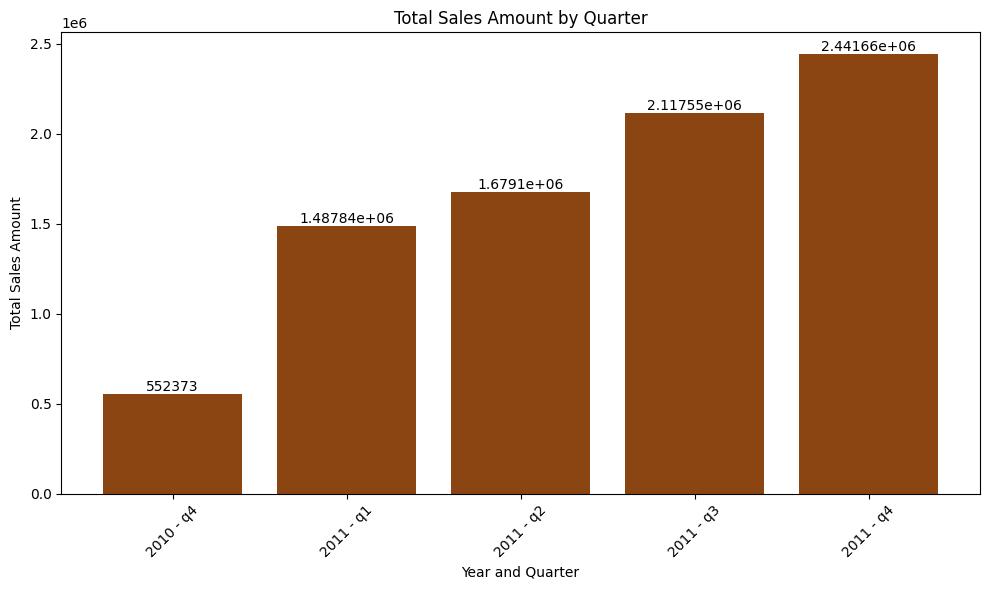

In [32]:
plt.figure(figsize=(10,6))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(df_sales_per_quarter['Year_Quarter'], 
        df_sales_per_quarter['TotalAmount'], 
        color='saddlebrown')

plt.bar_label(bars)

# Adding titles and labels
plt.title('Total Sales Amount by Quarter')
plt.xlabel('Year and Quarter')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

### Get the sales per month

In [33]:
# reset the indices
df_sales_per_month = df_sales_per_month.reset_index()
df_sales_per_month

,Year,Month,TotalAmount
0,2010,12,552372.860
1,2011,1,473731.900
2,2011,2,435534.070
3,2011,3,578576.210
4,2011,4,425222.671
5,2011,5,647011.670
6,2011,6,606862.520
7,2011,7,573112.321
8,2011,8,615078.090
9,2011,9,929356.232


In [34]:
# Combine Year and Month in a new column for x-axis labels
df_sales_per_month['Year_Month'] = df_sales_per_month['Year'].astype(str) + ' - m' + df_sales_per_month['Month'].astype(str)
df_sales_per_month

,Year,Month,TotalAmount,Year_Month
0,2010,12,552372.860,2010 - m12
1,2011,1,473731.900,2011 - m1
2,2011,2,435534.070,2011 - m2
3,2011,3,578576.210,2011 - m3
4,2011,4,425222.671,2011 - m4
5,2011,5,647011.670,2011 - m5
6,2011,6,606862.520,2011 - m6
7,2011,7,573112.321,2011 - m7
8,2011,8,615078.090,2011 - m8
9,2011,9,929356.232,2011 - m9


<Figure size 1000x600 with 0 Axes>

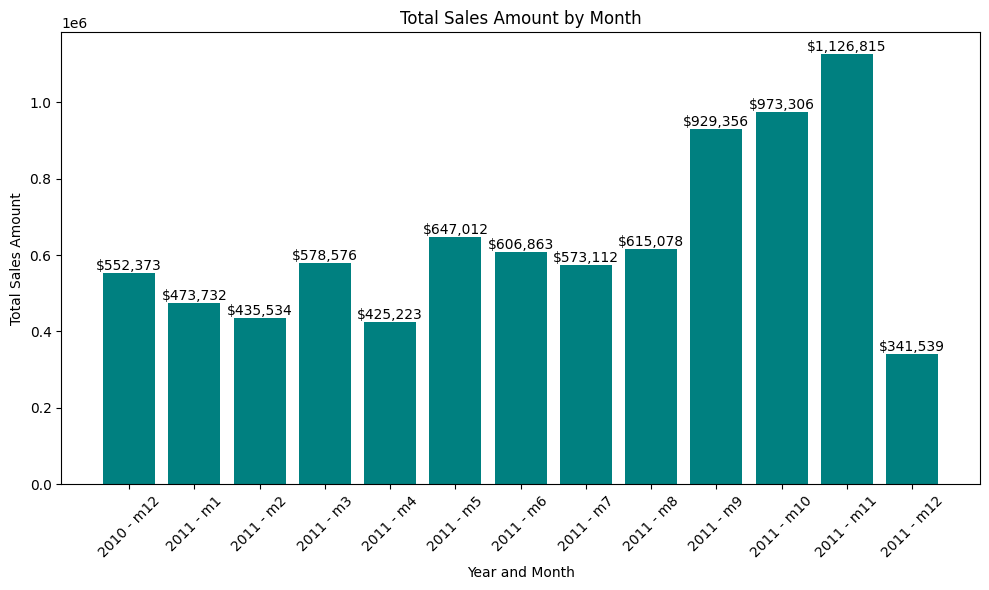

In [60]:
plt.figure(figsize=(10,6))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(df_sales_per_month['Year_Month'], 
        df_sales_per_month['TotalAmount'], 
        color='teal')

# show bars' values
plt.bar_label(bars, fmt='${:,.0f}'.format)

# Adding titles and labels
plt.title('Total Sales Amount by Month')
plt.xlabel('Year and Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

### Get the top 10 best-selling products

Group by Stock Code

In [36]:
top_10_products = dataset_retail_clean.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_10_products

StockCode
84077     53119
22197     48689
85099B    44963
84879     35215
85123A    34185
21212     33386
23084     27045
22492     25880
22616     25305
21977     24129
Name: Quantity, dtype: int64

In [37]:
# Reset the index of the new dataframe
top_10_products = top_10_products.reset_index()
top_10_products

,StockCode,Quantity
0,84077,53119
1,22197,48689
2,85099B,44963
3,84879,35215
4,85123A,34185
5,21212,33386
6,23084,27045
7,22492,25880
8,22616,25305
9,21977,24129


In [38]:
top_10_products = pd.merge(top_10_products, dataset_retail_clean[['StockCode', 'Description']].drop_duplicates(), on='StockCode', how='left')
top_10_products

,StockCode,Quantity,Description
0,84077,53119,WORLD WAR 2 GLIDERS ASSTD DESIGNS
1,22197,48689,SMALL POPCORN HOLDER
2,22197,48689,POPCORN HOLDER
3,85099B,44963,JUMBO BAG RED RETROSPOT
4,84879,35215,ASSORTED COLOUR BIRD ORNAMENT
5,85123A,34185,WHITE HANGING HEART T-LIGHT HOLDER
6,85123A,34185,CREAM HANGING HEART T-LIGHT HOLDER
7,21212,33386,PACK OF 72 RETROSPOT CAKE CASES
8,23084,27045,RABBIT NIGHT LIGHT
9,22492,25880,MINI PAINT SET VINTAGE


Let's plot the table

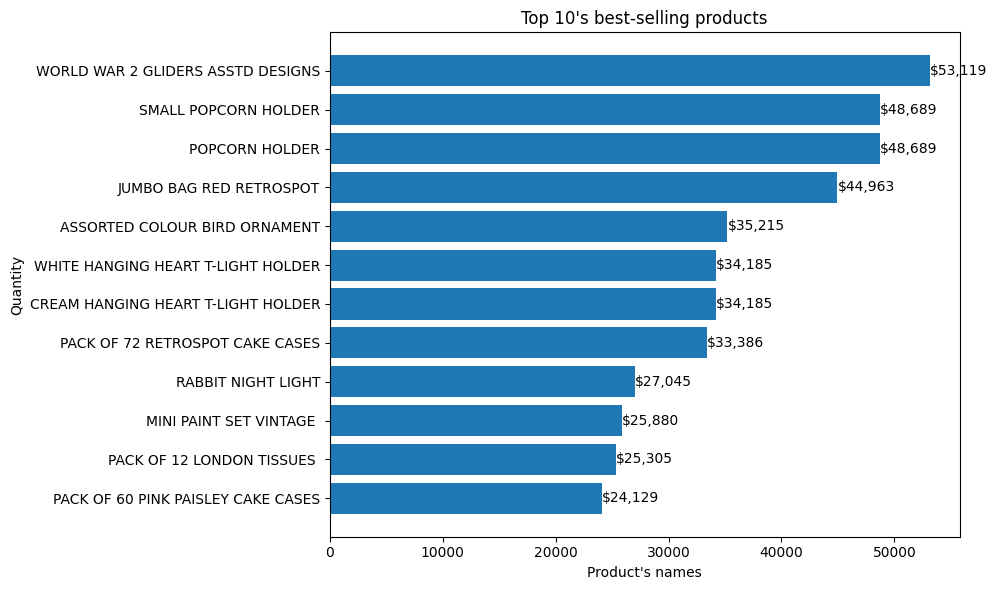

In [ ]:
plt.figure(figsize=(10,6))

# Plotting commands
bars = plt.barh(top_10_products['Description'], top_10_products['Quantity'])

# Plotting titles and labels
plt.title('Top 10\'s best-selling products')
plt.xlabel('Product\'s names')
plt.ylabel('Quantity')

# show bars' labels and show only formatted ints
plt.bar_label(bars, fmt='${:,.0f}')

# invert the order of display in the y-axis
plt.gca().invert_yaxis()

# Render the plot
#plt.savefig('top_products.svg') # Save the plot in svg format
plt.tight_layout()
plt.show()